# A simple map

In [54]:
%%capture 
%load_ext autoreload
%autoreload 2

from antarctic_plots import maps, fetch, regions, utils

makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)


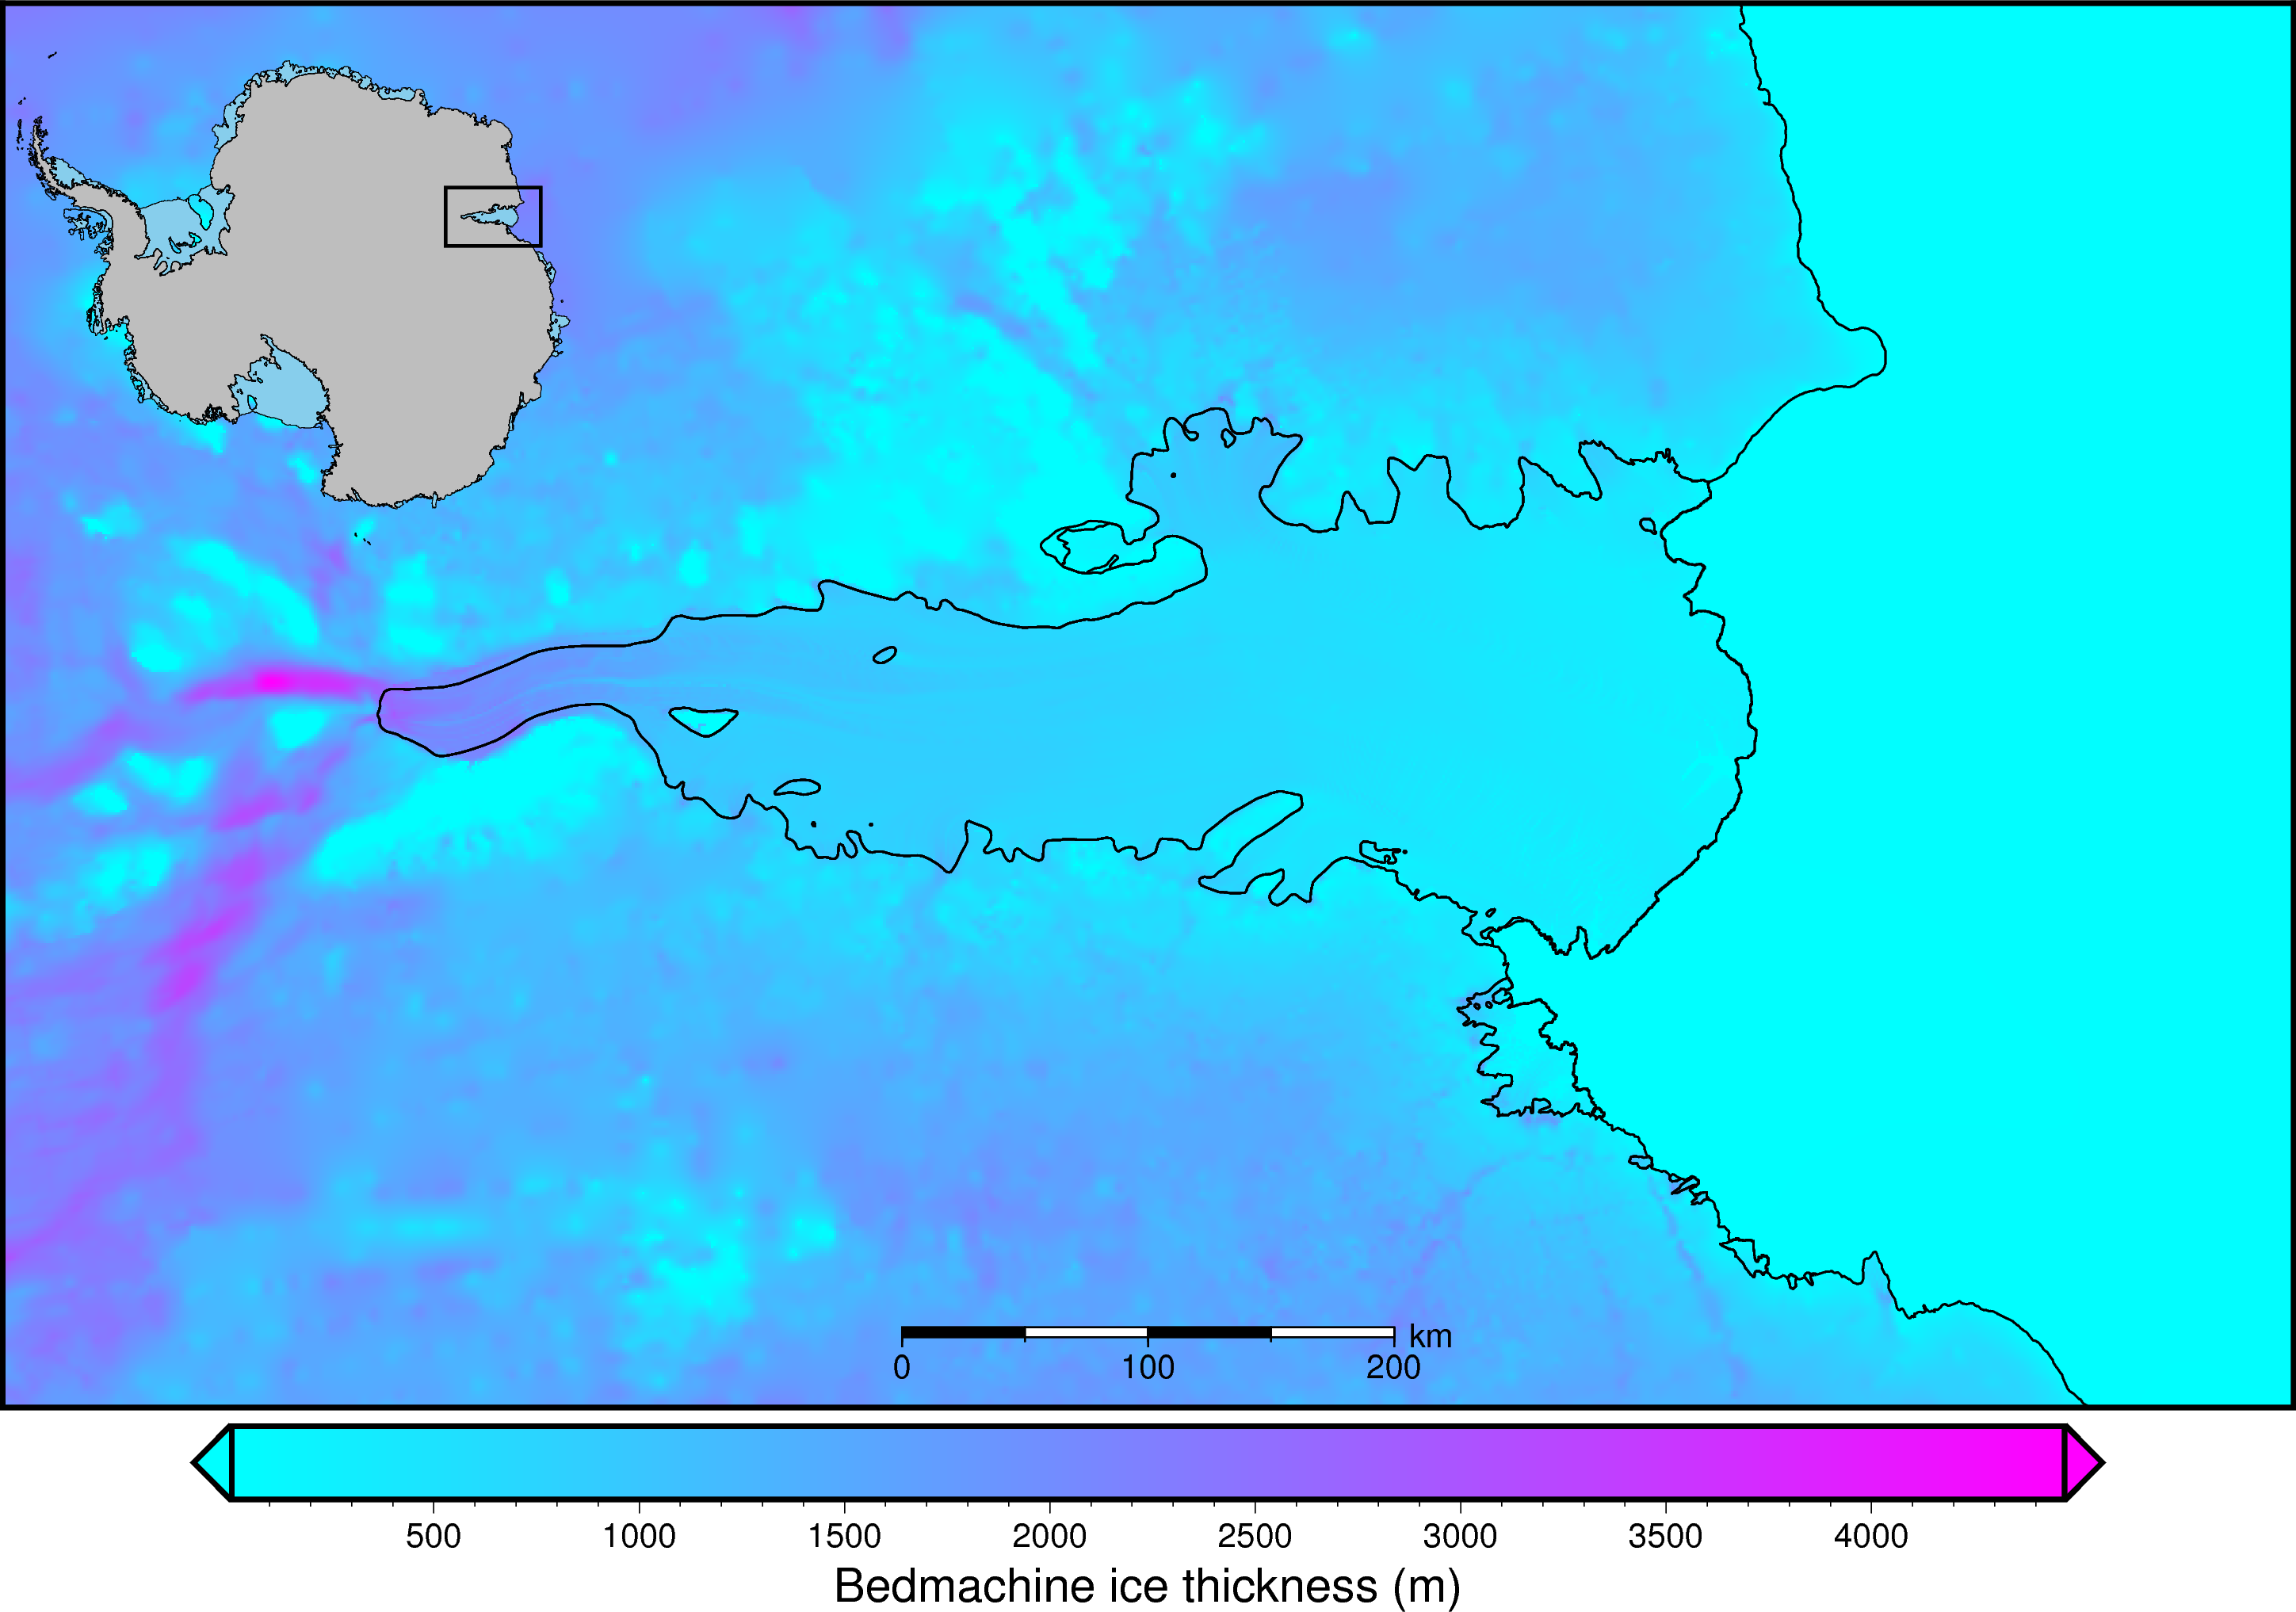

In [55]:
# load a grid file to plot
ice_thickness = fetch.bedmachine(
    layer="thickness",  # choose which layer to plot ['thickness', 'surface', 'bed', 'icebase']
    reference="ellipsoid",  # optionally convert from geoid to ellipsoid
    region=regions.amery_ice_shelf,  # choose a pre-defined region, or set your own
    spacing=1e3,  # optionally change the grid spacing
)

# plot with automatic figure properties
fig = maps.plot_grd(
    ice_thickness,  # set grid to plot
    cmap="cool",  # choose GMT colorscale
    coast=True,  # plot grounding and coastlines
    cbar_label="Bedmachine ice thickness (m)",  # add label
    inset=True,  # optionally add inset map showing location
    scalebar=True, # optionally add scalebar
)

# save the figure to use in the Gallery examples
fig.savefig('outputs/basic_map.png')

# display the figure
fig.show()